# 7506 - Trabajo Práctico 2

---

## Introducción

### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Dataset Train preprocesado
train_ds = pd.read_csv('datasets/tp1-train.csv')
train_ds = train_ds.drop(['Unnamed: 0'], axis=1)
train_ds.head()

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.613560,-58.436845,Caballito,Departamento,4.0,3.0,72.0,72.0,127000.0,RECICLADO A NUEVO!! Hermoso Departamento 4 Amb...
1,-34.608650,-58.408870,Balvanera,Departamento,4.0,3.0,107.0,103.0,165000.0,Departamento 4 Amb c/dep.serv al Frente c/Coch...
2,-34.625915,-58.520649,Versalles,Casa,3.0,2.0,151.0,151.0,155000.0,CASA A RECICLAR - EN VENTA - VERSALLES!
3,-34.582098,-58.448859,Palermo,Departamento,2.0,1.0,55.0,50.0,142298.0,Venta - Newbery Jorge 3445 5º A
4,-34.578438,-58.462492,Villa Ortuzar,Departamento,4.0,3.0,79.0,79.0,167900.0,VENTA DEPARTAMENTO 4 AMBIENTES - VILLA ORTUZAR


In [3]:
# Dataset Test preprocesado
test_ds = pd.read_csv('datasets/tp1-test.csv')
test_ds = test_ds.drop(['Unnamed: 0'], axis=1)
test_ds

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.630964,-58.465666,Flores,Departamento,3.0,2.0,74.0,60.0,115000.0,Departamento 3 ambientes - Flores
1,-34.596589,-58.410986,Palermo,Departamento,3.0,2.0,64.0,57.0,175000.0,PALERMO - Venta - Soler 3200 - 3 Ambientes Lum...
2,-34.596549,-58.403133,Recoleta,Departamento,6.0,4.0,210.0,195.0,530000.0,Recoleta 210 mts 5 amb con dependencia grupo e...
3,-34.619609,-58.400149,San Cristobal,Departamento,1.0,1.0,24.0,24.0,48000.0,VENTA DPTO MONOAMB EN PLANTA BAJA - SAN CRISTOBAL
4,-34.580743,-58.411841,Palermo,Departamento,2.0,1.0,43.0,43.0,145000.0,Departamento - Palermo Chico
...,...,...,...,...,...,...,...,...,...,...
16862,-34.577094,-58.465333,Belgrano,Departamento,5.0,3.0,180.0,140.0,530000.0,"VENTA! Duplex c Parrilla, Pileta y Terraza pr..."
16863,-34.593539,-58.402114,Recoleta,Departamento,6.0,3.0,178.0,163.0,480000.0,ESPECTACULAR DEPARTAMENTO EN VENTA-RETASADO
16864,-34.550719,-58.456377,Nuñez,PH,2.0,1.0,68.0,48.0,136000.0,ph venta nuñez 2 ambientes Patio sin expensa...
16865,-34.603496,-58.379792,San Nicolás,Departamento,1.0,1.0,24.0,24.0,45000.0,Venta de departamento monoambiente en Microcen...


## Procesamiento del lenguaje natural

### Ampliación del dataset

### Modelos

## Redes Neuronales

### Regresión

Predecir el precio de la propiedad y utilizar como métrica de evaluación el error cuadrático medio.

Vamos a predecir el precio de la propiedad (dolares) en base a la superifice total y cubierta. Ya que como vimos en el trabajo pasado, eran los atributos que mas se correlacionaban con el precio.

(Todas columnas tienen que ser numericas para Redes Neuronales)

In [34]:
def plot_regression(modelo, x, y, title="",xlabel="x",ylabel="y"):
    plt.figure()
    
    plt.plot(x,y,"o",label="Valores verdaderos")
    plt.plot(x,modelo.predict(x),"x",label="Valores estimados")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [5]:
def calcular_metricas_error(modelo, x_test_transform, y_test):
    y_pred = modelo.predict(x_test_transform)

    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)

    print(f"Error absoluto medio {mae}")
    print(f"Error cuadrático medio {mse}")

In [6]:
## Train
ds_trabajo_train = train_ds.drop(['place_l3', 'property_title', 'property_type'], axis=1)
ds_trabajo_train.head()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.613560,-58.436845,4.0,3.0,72.0,72.0,127000.0
1,-34.608650,-58.408870,4.0,3.0,107.0,103.0,165000.0
2,-34.625915,-58.520649,3.0,2.0,151.0,151.0,155000.0
3,-34.582098,-58.448859,2.0,1.0,55.0,50.0,142298.0
4,-34.578438,-58.462492,4.0,3.0,79.0,79.0,167900.0


In [7]:
## Test
ds_trabajo_test = test_ds.drop(['place_l3', 'property_title', 'property_type'], axis=1)
ds_trabajo_test.head()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.630964,-58.465666,3.0,2.0,74.0,60.0,115000.0
1,-34.596589,-58.410986,3.0,2.0,64.0,57.0,175000.0
2,-34.596549,-58.403133,6.0,4.0,210.0,195.0,530000.0
3,-34.619609,-58.400149,1.0,1.0,24.0,24.0,48000.0
4,-34.580743,-58.411841,2.0,1.0,43.0,43.0,145000.0


In [8]:
ds_trabajo_train.shape

(69662, 7)

In [9]:
## Train

columnas_predictoras = ds_trabajo_train.columns.to_list()
columnas_predictoras.remove('property_price')
columnas_predictoras

['latitud',
 'longitud',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered']

In [10]:
## Test

columnas_predictoras = ds_trabajo_test.columns.to_list()
columnas_predictoras.remove('property_price')
columnas_predictoras

['latitud',
 'longitud',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered']

In [11]:
variable_predictora = ["property_surface_total", "property_surface_covered", "latitud", "longitud", "property_bedrooms", "property_rooms"]

x_train = ds_trabajo_train.loc[:,variable_predictora]
x_test = ds_trabajo_test.loc[:,variable_predictora]
y_train = ds_trabajo_train.property_price
y_test = ds_trabajo_test.property_price

In [12]:
x_train

,property_surface_total,property_surface_covered,latitud,longitud,property_bedrooms,property_rooms
0,72.0,72.0,-34.613560,-58.436845,3.0,4.0
1,107.0,103.0,-34.608650,-58.408870,3.0,4.0
2,151.0,151.0,-34.625915,-58.520649,2.0,3.0
3,55.0,50.0,-34.582098,-58.448859,1.0,2.0
4,79.0,79.0,-34.578438,-58.462492,3.0,4.0
...,...,...,...,...,...,...
69657,181.0,171.0,-34.582722,-58.414936,3.0,4.0
69658,38.0,35.0,-34.625197,-58.392171,1.0,1.0
69659,58.0,58.0,-34.605126,-58.418537,3.0,4.0
69660,44.0,42.0,-34.572106,-58.434114,1.0,2.0


In [13]:
sscaler = StandardScaler()
sscaler.fit(pd.DataFrame(x_train))

StandardScaler()

In [29]:
x_train_transform = sscaler.transform(pd.DataFrame(x_train))
x_test_transform = sscaler.transform(pd.DataFrame(x_test))

#### Modelo 1

In [15]:
# Creo un modelo Red Neuronal
d_in=1
d_out=1

modelo1 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,))]) #, activation="relu"

In [16]:
modelo1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2022-11-15 23:28:45.488951: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 6)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
      • training=False
      • mask=None


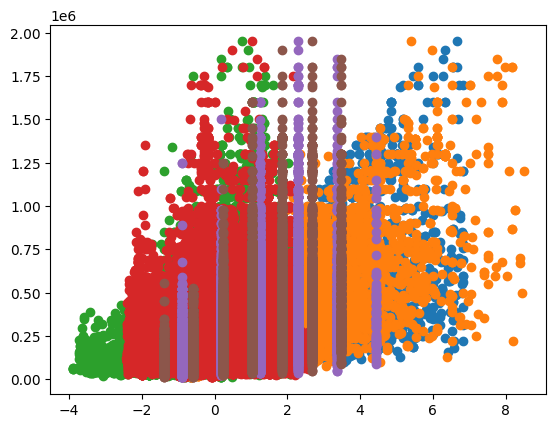

In [35]:
plot_regression(modelo1, x_train_transform, y_train, title = f"Modelo 1 Inicial Entrenado", xlabel="variables predictoras", ylabel="property_price")

In [ ]:
modelo1.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  metrics=['mae'], 
)

In [ ]:
# Entrenamiento del modelo
modelo1.fit(x_train_transform,y_train,epochs=100,batch_size=16,verbose=False)

Miremos como la red aprendio los datos con los que fue entrenada (TRAIN)

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 6)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
      • training=False
      • mask=None


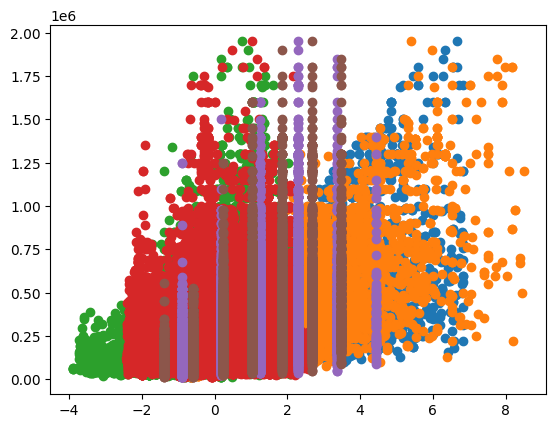

In [36]:
plot_regression(modelo1, x_train_transform, y_train, title = f"Modelo 1 Final Entrenado",xlabel = "property_surface_total", ylabel="property_price")

Miremos como la red predice (TEST)

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 6)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
      • training=False
      • mask=None


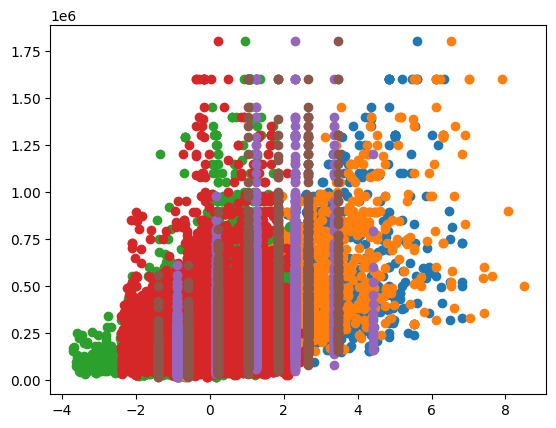

In [37]:
plot_regression(modelo1, x_test_transform, y_test,title = f"Modelo 1 Final Predicho", xlabel="property_surface_total", ylabel="property_price")

In [38]:
calcular_metricas_error(modelo1, x_test_transform, y_test)

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 6)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
      • training=False
      • mask=None


In [39]:
y_pred_modelo1 = modelo1.predict(x_test_transform)

mae_modelo1=mean_absolute_error(y_test,y_pred_modelo1)
mse_modelo1=mean_squared_error(y_test,y_pred_modelo1)

print(f"Error absoluto medio {mae_modelo1}")
print(f"Error cuadrático medio {mse_modelo1}")

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 6)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
      • training=False
      • mask=None


#### Modelo 2

In [40]:
# Creo un modelo Red Neuronal
d_in=1
d_out=1

modelo2 = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 2 salidas, activación relu
    keras.layers.Dense(2,input_shape=(d_in,), activation="relu"),
    # Capa con 2 salidas, activación tanh
    keras.layers.Dense(2, activation="tanh" ),
    keras.layers.Dense(d_out, )])

In [41]:
modelo2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 4         
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [42]:
modelo2.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['mae'], 
)

In [43]:
# Entrenamiento del modelo
modelo2.fit(x_train_transform,y_train,epochs=100,batch_size=16,verbose=False)

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "dense_1" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 6)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
      • training=True
      • mask=None


Verificamos cómo aprendio los datos de entrenamiento (TRAIN)

In [ ]:
plot_regression(modelo2,x_train_transform,y_train,title=f"Modelo 2 Final Entrenamiento",xlabel="property_surface_total",ylabel="property_price")

Miremos como la red predice (TEST)

In [ ]:
plot_regression(modelo2,x_test_transform,y_test,title=f"Modelo 2 Final Predicho",xlabel="property_surface_total",ylabel="property_price")

In [ ]:
calcular_metricas_error(modelo2, x_test_transform, y_test)

In [ ]:
y_pred=modelo2.predict(x_test_transform)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

print(f"Error absoluto medio {mae}")
print(f"Error cuadrático medio {mse}")

#### Modelo 3

In [44]:
# Creo un modelo Red Neuronal
d_in=1
d_out=1

modelo3 = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 2 salidas, activación relu
    keras.layers.Dense(2,input_shape=(d_in,), activation="relu"),
    # Capa con 2 salidas, activación tanh
    keras.layers.Dense(50, activation="relu" ),
    keras.layers.Dense(d_out, )])


In [ ]:
plot_regression(modelo3, x_train_transform, y_train, title = f"Modelo 3 Inicial Entrenado", xlabel="variables predictoras", ylabel="property_price")

In [45]:
modelo3.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['mae'], 
)

In [46]:
modelo3.fit(x_train_transform,y_train,epochs=100,batch_size=16,verbose=False)

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 6)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
      • training=True
      • mask=None


Miremos como la red aprendio los datos con los que fue entrenada (TRAIN)

In [ ]:
plot_regression(modelo3,x_test_transform,y_test,title=f"Modelo 3 Final Predicho",xlabel="property_surface_total",ylabel="property_price")

plot_regression(modelo1, x_test_transform, y_test,title = f"Modelo 1 Final Predicho", xlabel="property_surface_total", ylabel="property_price")Miremos como la red predice (TEST)

In [ ]:
plot_regression(modelo3, x_test_transform, y_test,title = f"Modelo 3 Final Predicho", xlabel="property_surface_total", ylabel="property_price")

Comparamos con el modelo 2

In [ ]:
plot_regression(modelo2,x_test_transform,y_test,title=f"Modelo 2 Final Predicho",xlabel="property_surface_total",ylabel="property_price")

### Clasificación

#### Construcción del target

#### Modelo

## Ensambles de modelos

### Ensamble 1

### Ensamble 2

## Conclusiones